## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  63.754544  1207.206635  0.390141  10.559367  1.530440
1  86.928647  1158.661571  0.060067   7.460787  0.855182
2  63.749148   943.476043  0.394875   2.939976  1.487342
3  93.052236  1233.550153  0.483624  10.025222  1.501540
4  75.768770  1643.165414  0.926652   6.045313  1.268461


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9842782	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9729108	total: 69.4ms	remaining: 34.6s
2:	learn: 0.9614392	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9524839	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9415380	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9315839	total: 71.5ms	remaining: 11.8s
6:	learn: 0.9215448	total: 72.1ms	remaining: 10.2s
7:	learn: 0.9136939	total: 72.7ms	remaining: 9.02s
8:	learn: 0.9030139	total: 73.2ms	remaining: 8.06s
9:	learn: 0.8930508	total: 73.8ms	remaining: 7.3s
10:	learn: 0.8856250	total: 74.2ms	remaining: 6.67s
11:	learn: 0.8766371	total: 74.8ms	remaining: 6.16s
12:	learn: 0.8677978	total: 75.3ms	remaining: 5.72s
13:	learn: 0.8582809	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8490123	total: 76.2ms	remaining: 5s
15:	learn: 0.8418403	total: 76.6ms	remaining: 4.71s
16:	learn: 0.8325469	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8240799	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8178689	total: 78.3ms	remaining: 4.

90:	learn: 0.4555905	total: 109ms	remaining: 1.09s
91:	learn: 0.4532314	total: 110ms	remaining: 1.08s
92:	learn: 0.4510868	total: 110ms	remaining: 1.07s
93:	learn: 0.4484563	total: 111ms	remaining: 1.07s
94:	learn: 0.4448115	total: 111ms	remaining: 1.06s
95:	learn: 0.4415106	total: 111ms	remaining: 1.05s
96:	learn: 0.4385028	total: 112ms	remaining: 1.04s
97:	learn: 0.4358487	total: 112ms	remaining: 1.03s
98:	learn: 0.4324891	total: 112ms	remaining: 1.02s
99:	learn: 0.4295069	total: 113ms	remaining: 1.02s
100:	learn: 0.4268202	total: 113ms	remaining: 1.01s
101:	learn: 0.4247878	total: 114ms	remaining: 1s
102:	learn: 0.4215122	total: 114ms	remaining: 993ms
103:	learn: 0.4188863	total: 114ms	remaining: 985ms
104:	learn: 0.4160251	total: 115ms	remaining: 978ms
105:	learn: 0.4133844	total: 115ms	remaining: 972ms
106:	learn: 0.4105621	total: 116ms	remaining: 965ms
107:	learn: 0.4084062	total: 116ms	remaining: 958ms
108:	learn: 0.4057400	total: 116ms	remaining: 951ms
109:	learn: 0.4029847	tot

265:	learn: 0.2021931	total: 186ms	remaining: 514ms
266:	learn: 0.2015894	total: 187ms	remaining: 513ms
267:	learn: 0.2011999	total: 187ms	remaining: 512ms
268:	learn: 0.2004946	total: 188ms	remaining: 510ms
269:	learn: 0.1996879	total: 188ms	remaining: 509ms
270:	learn: 0.1991375	total: 188ms	remaining: 507ms
271:	learn: 0.1985435	total: 189ms	remaining: 506ms
272:	learn: 0.1977554	total: 189ms	remaining: 504ms
273:	learn: 0.1973990	total: 190ms	remaining: 503ms
274:	learn: 0.1969047	total: 190ms	remaining: 501ms
275:	learn: 0.1961122	total: 191ms	remaining: 500ms
276:	learn: 0.1956624	total: 191ms	remaining: 499ms
277:	learn: 0.1951931	total: 192ms	remaining: 498ms
278:	learn: 0.1943485	total: 192ms	remaining: 496ms
279:	learn: 0.1936610	total: 193ms	remaining: 495ms
280:	learn: 0.1930535	total: 193ms	remaining: 494ms
281:	learn: 0.1923644	total: 193ms	remaining: 493ms
282:	learn: 0.1918851	total: 194ms	remaining: 491ms
283:	learn: 0.1914460	total: 194ms	remaining: 490ms
284:	learn: 

512:	learn: 0.1036228	total: 290ms	remaining: 276ms
513:	learn: 0.1034967	total: 291ms	remaining: 275ms
514:	learn: 0.1033729	total: 292ms	remaining: 275ms
515:	learn: 0.1031269	total: 292ms	remaining: 274ms
516:	learn: 0.1029808	total: 292ms	remaining: 273ms
517:	learn: 0.1025764	total: 293ms	remaining: 272ms
518:	learn: 0.1024329	total: 293ms	remaining: 272ms
519:	learn: 0.1021918	total: 294ms	remaining: 271ms
520:	learn: 0.1021102	total: 294ms	remaining: 270ms
521:	learn: 0.1018719	total: 295ms	remaining: 270ms
522:	learn: 0.1015310	total: 295ms	remaining: 269ms
523:	learn: 0.1012462	total: 295ms	remaining: 268ms
524:	learn: 0.1009665	total: 296ms	remaining: 268ms
525:	learn: 0.1008865	total: 296ms	remaining: 267ms
526:	learn: 0.1006563	total: 297ms	remaining: 267ms
527:	learn: 0.1001505	total: 297ms	remaining: 266ms
528:	learn: 0.0998221	total: 298ms	remaining: 265ms
529:	learn: 0.0995478	total: 298ms	remaining: 264ms
530:	learn: 0.0994309	total: 298ms	remaining: 264ms
531:	learn: 

691:	learn: 0.0645736	total: 368ms	remaining: 164ms
692:	learn: 0.0645442	total: 368ms	remaining: 163ms
693:	learn: 0.0643937	total: 369ms	remaining: 163ms
694:	learn: 0.0641744	total: 369ms	remaining: 162ms
695:	learn: 0.0639588	total: 370ms	remaining: 161ms
696:	learn: 0.0638567	total: 370ms	remaining: 161ms
697:	learn: 0.0636920	total: 371ms	remaining: 160ms
698:	learn: 0.0634553	total: 371ms	remaining: 160ms
699:	learn: 0.0633039	total: 371ms	remaining: 159ms
700:	learn: 0.0630907	total: 372ms	remaining: 159ms
701:	learn: 0.0629871	total: 372ms	remaining: 158ms
702:	learn: 0.0628986	total: 373ms	remaining: 157ms
703:	learn: 0.0626891	total: 373ms	remaining: 157ms
704:	learn: 0.0624594	total: 373ms	remaining: 156ms
705:	learn: 0.0623576	total: 374ms	remaining: 156ms
706:	learn: 0.0623139	total: 374ms	remaining: 155ms
707:	learn: 0.0622719	total: 375ms	remaining: 155ms
708:	learn: 0.0619953	total: 375ms	remaining: 154ms
709:	learn: 0.0617708	total: 376ms	remaining: 153ms
710:	learn: 

931:	learn: 0.0366168	total: 473ms	remaining: 34.5ms
932:	learn: 0.0365153	total: 474ms	remaining: 34ms
933:	learn: 0.0364093	total: 474ms	remaining: 33.5ms
934:	learn: 0.0363744	total: 474ms	remaining: 33ms
935:	learn: 0.0363382	total: 475ms	remaining: 32.5ms
936:	learn: 0.0363011	total: 475ms	remaining: 31.9ms
937:	learn: 0.0362353	total: 475ms	remaining: 31.4ms
938:	learn: 0.0360602	total: 476ms	remaining: 30.9ms
939:	learn: 0.0359553	total: 476ms	remaining: 30.4ms
940:	learn: 0.0359295	total: 477ms	remaining: 29.9ms
941:	learn: 0.0358656	total: 477ms	remaining: 29.4ms
942:	learn: 0.0357925	total: 478ms	remaining: 28.9ms
943:	learn: 0.0357720	total: 478ms	remaining: 28.4ms
944:	learn: 0.0356999	total: 479ms	remaining: 27.9ms
945:	learn: 0.0356044	total: 479ms	remaining: 27.4ms
946:	learn: 0.0355372	total: 480ms	remaining: 26.9ms
947:	learn: 0.0354747	total: 480ms	remaining: 26.3ms
948:	learn: 0.0354495	total: 481ms	remaining: 25.8ms
949:	learn: 0.0353779	total: 481ms	remaining: 25.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

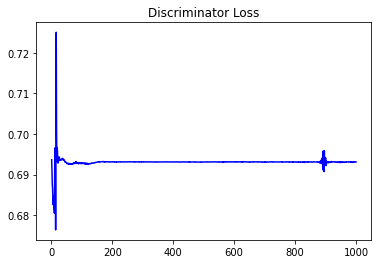

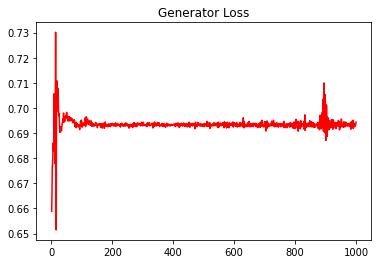

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5461129050059779


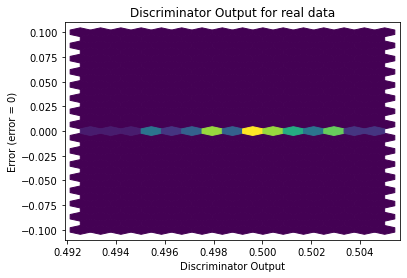

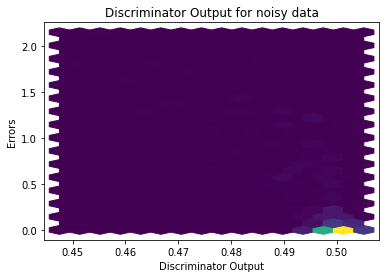

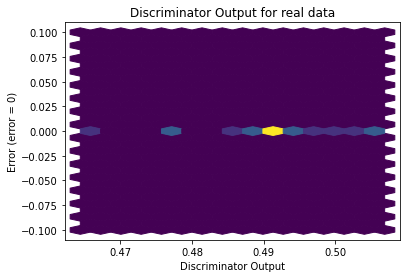

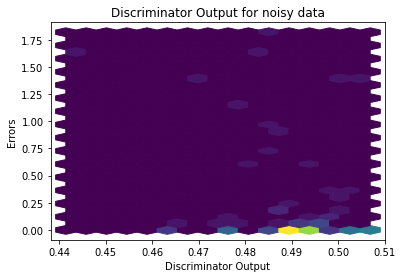

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


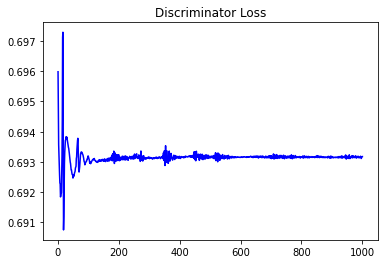

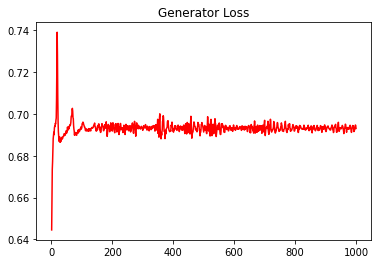

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.558484452646945


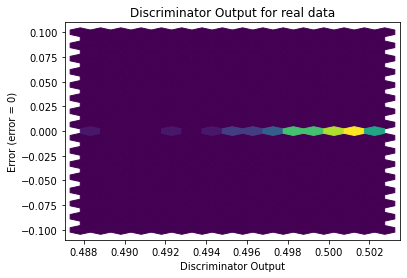

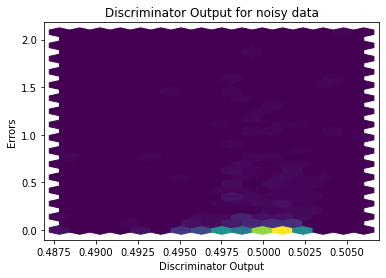

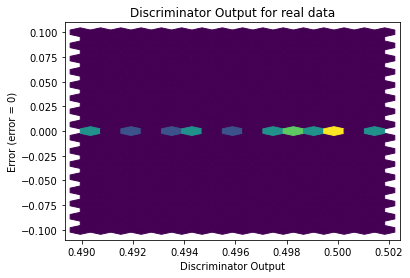

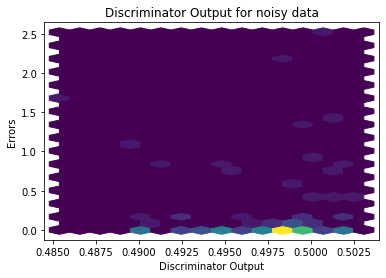

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0638]], requires_grad=True)
